In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [36]:
df1 = pd.read_csv(r'clinical_dataset_corrected.csv')
print("Number of fields in the df1:", df1.shape[1])

Number of fields in the df1: 55



# **Classification**


In [37]:
# Exclude the fields used for generating the fried categorization
excluded_fields = ['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower'
                   , 'grip_strength_abnormal', 'low_physical_activity']

# Split the dataset into features (X) and target (y)
features = df1.drop(excluded_fields, axis=1)
target = df1['fried']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



## **Random Forest Classifier**


In [52]:

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6851851851851852
Precision: 0.6969814241486069
Recall: 0.6851851851851852
F1 Score: 0.6877186524715595


In [53]:

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Match feature importances with feature names
feature_names = list(X_train.columns)  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importance dictionary based on importance values
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access the important feature names
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: gait_speed_4m, Importance: 0.07366357005750064
Feature: gait_get_up, Importance: 0.04862624078200283
Feature: cognitive_total_score, Importance: 0.04542565171776863
Feature: age, Importance: 0.04177144823245852
Feature: raise_chair_time, Importance: 0.040291984889843584
Feature: pain_perception, Importance: 0.03745972579774751
Feature: bmi_score, Importance: 0.03718343133327245
Feature: social_text, Importance: 0.03488419614722685
Feature: anxiety_perception, Importance: 0.03383245757682402
Feature: activity_regular, Importance: 0.033307398584291895
Feature: depression_total_score, Importance: 0.030890064967361703
Feature: waist, Importance: 0.02905573187527876
Feature: comorbidities_count, Importance: 0.028957203012307885
Feature: mmse_total_score, Importance: 0.02826189436506147
Feature: lean_body_mass, Importance: 0.02803246490023908
Feature: balance_single, Importance: 0.027008172868381617
Feature: medication_count, Importance: 0.026973067250947193
Feature: leisure_out, Im

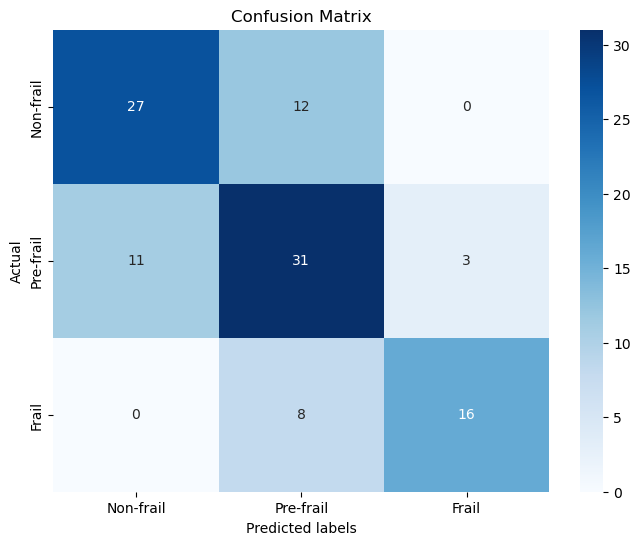

In [54]:

# Assuming y_true contains the true labels and y_pred contains the predicted labels
class_names = ['Non-frail', 'Pre-frail', 'Frail']   # Frail / Pre-frail / Non-frail --> 2 / 1 / 0

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


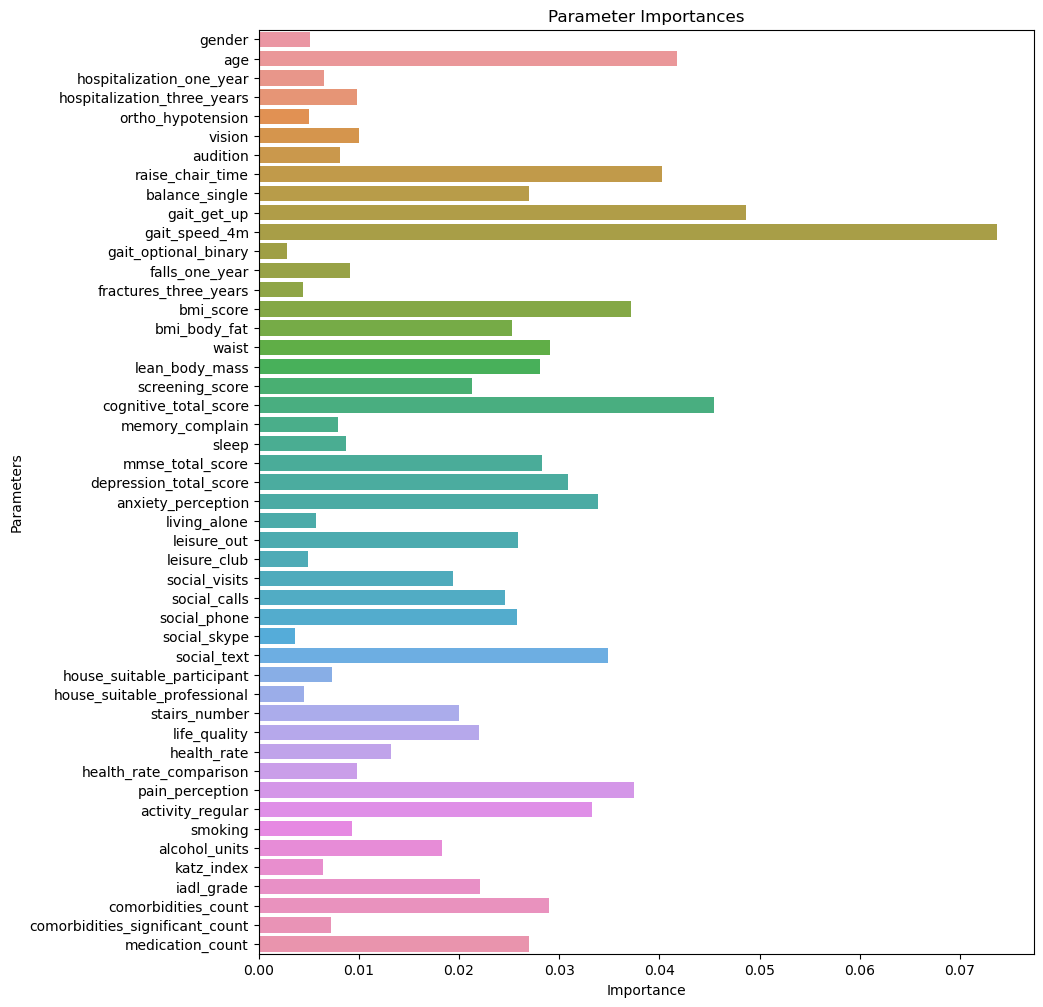

In [55]:
# Plot the feature importances
importances = rf_classifier.feature_importances_
feature_names = features.columns
plt.figure(figsize=(10, 12))
barp = sns.barplot(x=importances, y=feature_names, hue=feature_names, dodge=False)  # Set dodge=False to widen the bars
barp.legend_.remove()
plt.xlabel('Importance')
plt.ylabel('Parameters')
plt.title('Parameter Importances')
plt.show()

## **Logistic Regression**


In [56]:
# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model on your training data
pipeline.fit(X_train, y_train)

# Make predictions on your test data
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5833333333333334
Precision: 0.5951797385620915
Recall: 0.5833333333333334
F1 Score: 0.5833973961179496


## **Neural Network**


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for 'fried'
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy:', test_acc)


Epoch 1/50
14/14 [==============================] - 1s 26ms/step - loss: 1.1666 - accuracy: 0.3773 - val_loss: 1.0768 - val_accuracy: 0.4074
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.9542 - accuracy: 0.5532 - val_loss: 1.0029 - val_accuracy: 0.4815
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.8566 - accuracy: 0.6042 - val_loss: 0.9583 - val_accuracy: 0.5278
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.7844 - accuracy: 0.6505 - val_loss: 0.9059 - val_accuracy: 0.5926
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.7269 - accuracy: 0.6875 - val_loss: 0.8745 - val_accuracy: 0.5833
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.7245 - val_loss: 0.8513 - val_accuracy: 0.5833
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.7407 - val_loss: 0.8495 - val_accuracy: 0.5833
Epoch 8/50
14/14 [=